# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

To recommend to the College Board where money is best spent to improve the **SAT participation rates** based on the US state **of my choice**.

Improving the **lowest participation rates** for the states would be beneficial.

**Notes**

Describe your solutions
Inferential stats: 
Think about the population, is the 51 values a sample or sample mean? Each value is a sample mean for each state.

Adding line of best fit for scatter plots --> sns.lmplot()

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
pwd

'C:\\Users\\Trogg\\Documents\\General Assembly DS 18\\dsi18-projects\\project_1\\code'

In [3]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')

In [4]:
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

First 10 rows of sat_2017

In [5]:
#Code:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


First 10 rows of act_2017

In [6]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Need to describe the data, your data type for each attribute, .info(), .describe(), **skewnesss** and the **shape / dimension of the data**

Some differences between the tests:

ACT
 * **Includes Dedicated Science Section**
 * Focuses more on Student's Critical thinking
 * Covers geometry and trigonometry, **no Data Analysis**, probability and statistics
 * No calculator allowed
 * ACT score is between 1 ~ 36
 * Essays are optional
 * Shorter than SAT
 * Cost vary slightly between the two tests
 
 
 
 SAT
 * **Does not include dedicated Science Section**
 * Covers geometry and trigonometry and **Data Analysis**, **no probability and statistics**
 * Has a calulator and non-calculator section
 * SAT score is between 400 ~ 1600
 * Essays are optional
 * It's longer than ACT
 * Cost vary slightly between the two tests
 

Answer: 

For the sat_2017 dataframe, it provides the attributes: 
* State, 
* Average participation rate
* Evidence-based reading and writing 
* Math and the total scores for each state in the US.

For the act_2017 dataframe, it provides the attributes: 
* State 
* Average participation rate
* English 
* Math 
* Reading
* Science the Composite scores for each state in the US.

Student are not likely to take both SAT and ACT tests. *Composite scores are the average between English, Math, Reading and Science scores* for **ACT**

In [7]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [8]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

#### 4a. Does the data look complete? 

In [9]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
sat_2017.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,65%,561,541,1102
47,Washington,64%,541,534,1075
48,West Virginia,14%,558,528,1086
49,Wisconsin,3%,642,649,1291
50,Wyoming,3%,626,604,1230


In [11]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [12]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


Answer:  The national average is not included for sat_2017 and act_2017, but it's included in the data sources.

For **act_2017**, the *subjects*, English, Math, Reading and Science are not in the original data set

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

### Check the maximum and minimum values for each test in the website

## SAT Minimum scores and maximum scores

In [13]:
# sat_2017 minimum scores
sat_2017[['Evidence-Based Reading and Writing','Math','Total']].agg(['min','max'])

,Evidence-Based Reading and Writing,Math,Total
min,482,52,950
max,644,651,1295


The minimum and maximum scores for ERW is correct.

The minimum score for sat_2017 math is 52, but the range is between 468 ~ 651, based on the pdf file the **correct value should be 524**.

In [14]:
sat_2017['Math'].describe()

count     51.000000
mean     547.627451
std       84.909119
min       52.000000
25%      522.000000
50%      548.000000
75%      599.000000
max      651.000000
Name: Math, dtype: float64

In [15]:
sat_2017.loc[sat_2017['Math'] == sat_2017['Math'].min()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


## ACT Minimum scores and maximum scores

Note that composite scores are strings

In [16]:
act_2017['Composite'].min()

'17.8'

In [17]:
act_2017['Composite'].max()

'25.5'

In [18]:
act_2017[['English', 'Math', 'Reading', 'Science']].agg(['min','max'])

,English,Math,Reading,Science
min,16.3,18.0,18.1,2.3
max,25.5,25.3,26.0,24.9


**act_2017 science minimum score** is incorrect when compared to the pdf file, the correct value should be **23.2**

In [19]:
act_2017[act_2017['Science'] == act_2017['Science'].min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

### Fixing error for SAT 2017

**The minimum score for sat_2017** math is **52**, but the range is between 468 ~ 651 in the original dataset, the **correct value should be 524**.

In [20]:
min_math_score = sat_2017[sat_2017['Math'] == sat_2017['Math'].min()]
min_math_score

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [21]:
sat_2017.loc[20,'Math'] = 524

In [22]:
sat_2017.loc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

### Fixing error for ACT 2017

In [23]:
act_2017[act_2017['Science'] == act_2017['Science'].min()]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


**act_2017 science minimum score** is incorrect when compared to the pdf file, the correct value should be **23.2**

In [24]:
act_2017.loc[21, 'Science'] = 23.2
act_2017.loc[21]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [25]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [26]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

For sat_2017, participation should be a float type not object

For act_2017, participation should be a float type not object and composite should be a float type not object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

## Transforming sat_2017 Participation attribute into float type

In [27]:
#code
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda i:float(i.replace('%','')))
sat_2017['Participation']

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [28]:
sat_2017['Participation'].dtype

dtype('float64')

## Transforming act_2017 participation and composite into float type

In [29]:
# act_2017['Participation'].map({'%':''})
act_2017['Participation'] = act_2017['Participation'].apply(lambda s:float(s.replace('%','')))
act_2017['Participation']

0      60.0
1     100.0
2      65.0
3      62.0
4     100.0
5      31.0
6     100.0
7      31.0
8      18.0
9      32.0
10     73.0
11     55.0
12     90.0
13     38.0
14     93.0
15     35.0
16     67.0
17     73.0
18    100.0
19    100.0
20      8.0
21     28.0
22     29.0
23     29.0
24    100.0
25    100.0
26    100.0
27    100.0
28     84.0
29    100.0
30     18.0
31     34.0
32     66.0
33     31.0
34    100.0
35     98.0
36     75.0
37    100.0
38     40.0
39     23.0
40     21.0
41    100.0
42     80.0
43    100.0
44     45.0
45    100.0
46     29.0
47     29.0
48     29.0
49     69.0
50    100.0
51    100.0
Name: Participation, dtype: float64

In [30]:
act_2017['Participation'].dtype

dtype('float64')

- Fix any individual values preventing other columns from being the appropriate type.

In [31]:
#code

In [32]:
act_2017[act_2017['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.2x


In [33]:
act_2017['Composite'] =act_2017['Composite'].str.replace("20.2x",'20.2')
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [34]:
act_2017['Composite'].dtype

dtype('float64')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [35]:
#code

- Display the data types again to confirm they are correct.

In [36]:
#Code:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [37]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

## Changing the column names for Sat_2017

Change them to sat_17_participation, sat_17_evidenced_based_reading_writing, sat_17_math, sat_17_total

First change all to lower case

In [38]:
#code
sat_2017 = sat_2017.rename(str.lower, axis='columns')
sat_2017.head()

,state,participation,evidence-based reading and writing,math,total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [39]:
sat_2017.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

In [40]:
sat_2017 = sat_2017.rename(columns={k:"sat_17_"+k for k in sat_2017.columns[1:]}) # Run once only, if not it'll duplicate
sat_2017.head()

,state,sat_17_participation,sat_17_evidence-based reading and writing,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [41]:
sat_2017 = sat_2017.rename(columns={"sat_17_evidence-based reading and writing": "sat_17_erw"})
sat_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


## Changing the columns for act 2017

In [42]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [43]:
act_2017 = act_2017.rename(str.lower, axis='columns')
act_2017.head()

,state,participation,english,math,reading,science,composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [44]:
act_2017 = act_2017.rename(columns={k:"act_17_"+k for k in act_2017.columns[1:]})
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [45]:
act_2017 = act_2017.rename(columns={'act_17_composite':"act_17_average_composite"})
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**|

# Have to do this

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [46]:
#code
act_2017.head()
# Need to remove index 0 as it's the national aggregate

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [47]:
act_2017 = act_2017.drop(0, axis='index')
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [48]:
sat_2017.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total'],
      dtype='object')

In [49]:
act_2017.columns

Index(['state', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite'],
      dtype='object')

In [50]:
#Code:
combined_2017 = sat_2017.merge(act_2017,on='state')
combined_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [51]:
#code
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

## Importing 2018 SAT DataFrame

In [52]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [53]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [54]:
sat_2018[['Evidence-Based Reading and Writing', 'Math', 'Total']].agg(['min', 'max'])

,Evidence-Based Reading and Writing,Math,Total
min,480,480,977
max,643,655,1298


### Converting Participation into float type

I'll make *Participation rates* will be in float types for all the Data Frames

In [55]:
sat_2018['Participation'] = sat_2018['Participation'].apply(lambda s:float(s.replace('%',""))) # Run once only
sat_2018['Participation']

0       6.0
1      43.0
2      29.0
3       5.0
4      60.0
5     100.0
6     100.0
7     100.0
8      92.0
9      56.0
10     70.0
11     56.0
12    100.0
13     99.0
14     63.0
15      3.0
16      4.0
17      4.0
18      4.0
19     99.0
20     76.0
21     80.0
22    100.0
23      4.0
24      3.0
25      4.0
26     10.0
27      3.0
28     23.0
29     96.0
30     82.0
31     16.0
32     79.0
33     52.0
34      2.0
35      8.0
36     18.0
37     48.0
38     70.0
39     97.0
40     55.0
41      3.0
42      6.0
43     66.0
44      4.0
45     64.0
46     68.0
47     69.0
48     28.0
49      3.0
50      3.0
Name: Participation, dtype: float64

### Renaming the columns to *sat_2018_column*

In [56]:
sat_2018 = sat_2018.rename(str.lower, axis='columns')
sat_2018.head()

,state,participation,evidence-based reading and writing,math,total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [57]:
sat_2018 = sat_2018.rename(columns={col:"sat_18_"+col for col in sat_2018.columns[1:]})
sat_2018.head()

,state,sat_18_participation,sat_18_evidence-based reading and writing,sat_18_math,sat_18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [58]:
sat_2018 = sat_2018.rename(columns={"sat_18_evidence-based reading and writing": "sat_18_erw"})
sat_2018.head()

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [59]:
sat_2018.tail()

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
46,Virginia,68.0,567,550,1117
47,Washington,69.0,543,538,1081
48,West Virginia,28.0,513,486,999
49,Wisconsin,3.0,641,653,1294
50,Wyoming,3.0,633,625,1257


## Importing 2018 ACT DataFrame

In [60]:
act_2018 = pd.read_csv('../data/act_2018_updated.csv')
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [61]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [62]:
act_2018.agg(['min', 'max'])

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
min,Alabama,7,17.7,16.6,17.8,18.0,17.9
max,Wyoming,100,25.6,26.0,25.2,26.1,24.9


### Transforming act_2018 'Percentage of Students Tested' into float type

Participation rates and percentage of students tested will be converted to floating types

In [63]:
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype('float')
act_2018['Percentage of Students Tested'].dtype

dtype('float64')

### Transforming the columns for act_2018

In [64]:
# act_2018 = act_2018.rename(str.lower, axis='columns')
# act_2018.head()

In [65]:
act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [68]:
def add_underscore_char(words,test_name='test'):
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
            if lst[0] == 'percentage':
                new_dict[word] = test_name + "participation"
            elif lst[0] == 'average':
                new_dict[word] = test_name + lst[1]
            else:
                new_dict[word] = test_name+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
add_underscore_char(act_2018.columns,"act_18_")

{'State': 'state',
 'Percentage of Students Tested': 'act_18_participation',
 'Average Composite Score': 'act_18_composite',
 'Average English Score': 'act_18_english',
 'Average Math Score': 'act_18_math',
 'Average Reading Score': 'act_18_reading',
 'Average Science Score': 'act_18_science'}

In [67]:
act_2018 = act_2018.rename(columns= add_underscore_char(act_2018.columns, "act_18_")) # Run once only

In [68]:
act_2018.head(3)

,state,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2


In [69]:
act_2018.tail()

,state,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
46,Virginia,24.0,23.9,23.8,23.3,24.7,23.5
47,Washington,24.0,22.2,21.4,22.2,22.7,22.0
48,West Virginia,65.0,20.3,19.8,19.4,21.3,20.4
49,Wisconsin,100.0,20.5,19.8,20.3,20.6,20.8
50,Wyoming,100.0,20.0,19.0,19.7,20.6,20.3


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [70]:
combined_2018 = sat_2018.merge(act_2018,on='state')
combined_2018.head(3)

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2


In [71]:
combined_2017.head(3)

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7


In [72]:
final_sat_act = combined_2017.merge(combined_2018, on='state')
final_sat_act.head(3)

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,...,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2


In [73]:
final_sat_act.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [74]:
#Code:
final_sat_act.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_17_average_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [75]:
#code
def std(x):
    mean = np.mean(x)
    errors = np.square(x - mean)
    var = np.sum(errors)/len(x)
    return np.sqrt(var)    

In [76]:
a = final_sat_act['sat_17_participation']
std(a)

34.929070766645076

In [77]:
np.std(a)

34.929070766645076

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [78]:
#Code:
# Alternative
# sd = dict(final_sat_act.select_dtypes(include=['float','int']).apply(std))
# sd

In [79]:
sd = {attr: round(std(value),2) for attr, value in final_sat_act.select_dtypes(include=['float', 'int']).items()}
sd

{'sat_17_participation': 34.93,
 'act_17_participation': 31.82,
 'act_17_english': 2.33,
 'act_17_math': 1.96,
 'act_17_reading': 2.05,
 'act_17_science': 1.72,
 'act_17_average_composite': 2.0,
 'sat_18_participation': 36.95,
 'act_18_participation': 33.75,
 'act_18_average_composite_score': 2.09,
 'act_18_average_english_score': 2.42,
 'act_18_average_math_score': 2.02,
 'act_18_average_reading_score': 2.15,
 'act_18_average_science_score': 1.85}

In [80]:
final_sat_act.select_dtypes(include=['float', 'int']).agg('std')

sat_17_participation              35.276632
act_17_participation              32.140842
act_17_english                     2.353677
act_17_math                        1.981989
act_17_reading                     2.067271
act_17_science                     1.739353
act_17_average_composite           2.020695
sat_18_participation              37.314256
act_18_participation              34.080976
act_18_average_composite_score     2.106278
act_18_average_english_score       2.446356
act_18_average_math_score          2.035765
act_18_average_reading_score       2.167245
act_18_average_science_score       1.870114
dtype: float64

In [81]:
final_sat_act.select_dtypes(include=['float', 'int']).apply(np.std)

sat_17_participation              34.929071
act_17_participation              31.824176
act_17_english                     2.330488
act_17_math                        1.962462
act_17_reading                     2.046903
act_17_science                     1.722216
act_17_average_composite           2.000786
sat_18_participation              36.946619
act_18_participation              33.745195
act_18_average_composite_score     2.085526
act_18_average_english_score       2.422254
act_18_average_math_score          2.015707
act_18_average_reading_score       2.145892
act_18_average_science_score       1.851689
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The manually calcuated standard deviations are slightly different from the Pandas describe method. However, it's similar to the numpy's `std` method

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### 2017 SAT Participation rates

In [82]:
final_sat_act.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

In [83]:
states = final_sat_act['state'].values
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [84]:
sat_17_part = final_sat_act[['state','sat_17_participation']]
sat_17_part = sat_17_part.sort_values('sat_17_participation', ascending=False) # Sort the participation values
# sat_17_sort_state = sat_17_part.sort_index() # Sort the states

In [85]:
sat_17_part.head().sort_index() # Highest participation rates for sat 2017

,state,sat_17_participation
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0
29,New Hampshire,96.0


In [86]:
sat_17_part.tail().sort_index() # Lowest participation rates for sat 2017

,state,sat_17_participation
3,Arkansas,3.0
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0
50,Wyoming,3.0


### SAT 18 Participation rates

In [87]:
#code
sat_18_part = final_sat_act[['state', 'sat_18_participation']]
sat_18_part = sat_18_part.sort_values('sat_18_participation', ascending=False) # Sort the participation values
sat_18_part.head(10)

,state,sat_18_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0
13,Illinois,99.0
39,Rhode Island,97.0
29,New Hampshire,96.0
8,District of Columbia,92.0


In [88]:
sat_18_part.head() # Highest participation rates for sat 2018

,state,sat_18_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0


In [89]:
sat_18_part.tail() # Lowest participation rates for sat 2018

,state,sat_18_participation
24,Mississippi,3.0
15,Iowa,3.0
49,Wisconsin,3.0
50,Wyoming,3.0
34,North Dakota,2.0


In [90]:
# Both highest and lowest participation rates for sat 17 and sat 18
# final_sat_act[['state','sat_17_participation', 'sat_18_participation']].groupby('state').agg(['min'])
sat_17_part['sat_17_participation'][:5]

8     100.0
22    100.0
6     100.0
7     100.0
29     96.0
Name: sat_17_participation, dtype: float64

sat 17 states with the highest participation rates:

* District of Columbia
* Michigan
* Connecticut
* Delaware 
* New Hampshire

sat 17 states with lowest participation rates:
* Arkansas
* Wyoming
* North Dakota
* Mississippi
* Iowa

sat 18 states with highest participation rates:

* Colorado
* Connecticut
* Delaware 
* Michigan
* Idaho

sat 18 states with lowest participation rates:
* Mississippi
* Iowa
* Wisconsin
* Wyoming
* North Dakota 	

Participation rates in **Colorado** increased significantly in 2018 compared to 2017. 

### 2017 ACT Participation rates

In [91]:
final_sat_act.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

In [92]:
final_sat_act[['state','act_17_participation', 'act_18_participation']].head()

,state,act_17_participation,act_18_participation
0,Alabama,100.0,100.0
1,Alaska,65.0,33.0
2,Arizona,62.0,66.0
3,Arkansas,100.0,100.0
4,California,31.0,27.0


In [93]:
act_17_part = final_sat_act[['state','act_17_participation']]
# .set_index(states).drop('state',axis=1)
act_17_part = act_17_part.sort_values('act_17_participation', ascending=False) # Sort the participation values
act_17_part.head() # States with highest participation for act 2017

,state,act_17_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [94]:
act_17_part.tail() # States with lowest participation act 2017

,state,act_17_participation
38,Pennsylvania,23.0
39,Rhode Island,21.0
7,Delaware,18.0
29,New Hampshire,18.0
19,Maine,8.0


### 2018 ACT Participation rates

In [95]:
act_18_part = final_sat_act[['state','act_18_participation']]
act_18_part = act_18_part.sort_values('act_18_participation', ascending=False) # Sort the participation values
act_18_part.head() # States with highest participation for act 2018

,state,act_18_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [96]:
act_18_part.tail() # States with lowest participation for act 2018

,state,act_18_participation
38,Pennsylvania,20.0
7,Delaware,17.0
29,New Hampshire,16.0
39,Rhode Island,15.0
19,Maine,7.0


## Top and bottom 5 SAT 17 and SAT 18 total scores for the states

sat_17_total

act_17_average composite

sat_18_total

act_18_average composite score


    Which states have the highest and lowest participation rates for the:
        2017 SAT?
        2018 SAT?
        2017 ACT?
        2018 ACT?
    Which states have the highest and lowest mean total/composite scores for the:
        2017 SAT?
        2018 SAT?
        2017 ACT?
        2018 ACT?
    Do any states with 100% participation on a given test have a rate change year-to-year?
    Do any states show have >50% participation on both tests either year?


In [97]:
sat_17_18_scores = final_sat_act[['state','sat_17_total', 'sat_18_total']].copy()
sat_17_18_scores.head()

,state,sat_17_total,sat_18_total
0,Alabama,1165,1166
1,Alaska,1080,1106
2,Arizona,1116,1149
3,Arkansas,1208,1169
4,California,1055,1076


In [98]:
sat_17_scores = sat_17_18_scores.sort_values('sat_17_total', ascending=False).drop('sat_18_total', axis=1)
sat_17_scores.head() # Top 5 SAT total scores for each state 2017

,state,sat_17_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [99]:
sat_17_scores.tail() # Bottom 5 SAT total scores for each state 2017

,state,sat_17_total
19,Maine,1012
12,Idaho,1005
22,Michigan,1005
7,Delaware,996
8,District of Columbia,950


In [100]:
sat_18_scores = sat_17_18_scores.sort_values('sat_18_total', ascending=False).drop('sat_17_total', axis=1)
sat_18_scores.head() # Top 5 SAT total scores for each state 2018

,state,sat_18_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [101]:
sat_18_scores.tail() # Bottom 5 SAT total scores for each state 2018

,state,sat_18_total
11,Hawaii,1010
12,Idaho,1001
48,West Virginia,999
7,Delaware,998
8,District of Columbia,977


## Top and bottom 5 ACT 17 and ACT 18 total scores for the states

In [102]:
final_sat_act.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

In [103]:
act_17_18_scores = final_sat_act[['state','act_17_average_composite', 'act_18_average_composite_score']].copy()
act_17_18_scores.head()

,state,act_17_average_composite,act_18_average_composite_score
0,Alabama,19.2,19.1
1,Alaska,19.8,20.8
2,Arizona,19.7,19.2
3,Arkansas,19.4,19.4
4,California,22.8,22.7


In [104]:
act_17_scores = act_17_18_scores[['state', 'act_17_average_composite']].sort_values('act_17_average_composite', ascending=False).copy()
act_17_scores.head() # Highest act 2017 scores

,state,act_17_average_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [105]:
act_17_scores.tail() # Lowest act 2017 scores

,state,act_17_average_composite
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


### Do any states with 100% participation on a given test have a rate change year-to-year?

### SAT 2017 and 2018 participation rates

### Difference in participation for sat 2017 for each states

In [106]:
sat_17_part_state = sat_17_part.sort_values('state')
sat_17_part_state

,state,sat_17_participation
0,Alabama,5.0
1,Alaska,38.0
2,Arizona,30.0
3,Arkansas,3.0
4,California,53.0
5,Colorado,11.0
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
9,Florida,83.0


In [107]:
sat_18_part_state = sat_18_part.sort_values('state')
sat_18_part_state

,state,sat_18_participation
0,Alabama,6.0
1,Alaska,43.0
2,Arizona,29.0
3,Arkansas,5.0
4,California,60.0
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,92.0
9,Florida,56.0


In [108]:
sat_17_18 = sat_17_part_state.merge(sat_18_part_state,on='state')
sat_17_18.head()

,state,sat_17_participation,sat_18_participation
0,Alabama,5.0,6.0
1,Alaska,38.0,43.0
2,Arizona,30.0,29.0
3,Arkansas,3.0,5.0
4,California,53.0,60.0


In [109]:
sat_17_18['Difference in %'] = abs(round((sat_17_18['sat_17_participation'] - sat_17_18['sat_18_participation'])/sat_17_18['sat_17_participation'],2))*100
sat_17_18.sort_values('Difference in %',ascending=False)

,state,sat_17_participation,sat_18_participation,Difference in %
13,Illinois,9.0,99.0,1000.0
5,Colorado,11.0,100.0,809.0
48,West Virginia,14.0,28.0,100.0
3,Arkansas,3.0,5.0,67.0
15,Iowa,2.0,3.0,50.0
35,Ohio,12.0,18.0,50.0
24,Mississippi,2.0,3.0,50.0
31,New Mexico,11.0,16.0,45.0
39,Rhode Island,71.0,97.0,37.0
25,Missouri,3.0,4.0,33.0


# *Illinois* has a large increase in sat participation with a **1000%** increase

In [110]:
sat_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [111]:
sat_2018.head()

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [112]:
sat_all = sat_2017.merge(sat_2018, on='state')
sat_all.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,5.0,593,572,1165,6.0,595,571,1166
1,Alaska,38.0,547,533,1080,43.0,562,544,1106
2,Arizona,30.0,563,553,1116,29.0,577,572,1149
3,Arkansas,3.0,614,594,1208,5.0,592,576,1169
4,California,53.0,531,524,1055,60.0,540,536,1076


In [113]:
sat_full_participation = sat_all[(sat_all['sat_17_participation'] == 100) | (sat_all['sat_18_participation'] == 100)].copy()
sat_full_participation.sort_values(['sat_17_participation', 'sat_17_participation'])

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
5,Colorado,11.0,606,595,1201,100.0,519,506,1025
12,Idaho,93.0,513,493,1005,100.0,508,493,1001
6,Connecticut,100.0,530,512,1041,100.0,535,519,1053
7,Delaware,100.0,503,492,996,100.0,505,492,998
8,District of Columbia,100.0,482,468,950,92.0,497,480,977
22,Michigan,100.0,509,495,1005,100.0,511,499,1011


The participation rate for **sat** increases significantly for *Colorado* from 11% in 2017 to 100%. This also lead to a decrease in test scores for SAT. 

The other states do not differ as much.

### ACT 2017 and 2018 participation rates

In [114]:
act_all = act_2017.merge(act_2018, on='state')
act_all.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,100.0,19.4,19.1,18.9,19.7,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8,27.0,22.7,22.5,22.5,23.0,22.1


In [115]:
act_part_17_18 = act_all[(act_all['act_17_participation'] == 100) | (act_all['act_18_participation'] == 100)][['state', 'act_17_participation', 'act_18_participation']]
act_part_17_18.sort_values(['act_17_participation', 'act_18_participation'])

,state,act_17_participation,act_18_participation
35,Ohio,75.0,100.0
27,Nebraska,84.0,100.0
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
17,Kentucky,100.0,100.0
18,Louisiana,100.0,100.0
24,Mississippi,100.0,100.0
25,Missouri,100.0,100.0


*Colorado* faced the biggest decline in participation rates of act 100% in 2017 to **30%** in 2018.

Largest increase in participation rate for *Ohio* with about 33% increase in participation rates

### Do any states show have >50% participation on both tests either year?

In [116]:
final_sat_act.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

In [117]:
final_sat_act[(final_sat_act['sat_17_participation'] > 50) & (final_sat_act['sat_18_participation'] > 50) & 
              (final_sat_act['act_17_participation'] > 50) &
             (final_sat_act['act_18_participation'])]

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,...,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,...,56.0,550,549,1099,66.0,19.9,19.2,19.3,21.1,19.5
10,Georgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,...,70.0,542,522,1064,53.0,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,...,56.0,480,530,1010,89.0,18.9,18.2,19.0,19.1,19.0


Only 3 states, Florida, Georgia and Hawaii showed more than 50% participation rates in both tests and years.

This shows that most students will take either 1 of the tests due to either time or financial constraints.

## In Summary

**SAT tests**

The participation rate for SAT increases significantly for **Colorado** from 11% in 2017 to 100%. This also lead to a decrease in test scores for SAT.

The other states do not differ as much.

**Illinois** has a large increase in SAT participation with a 1000% increase in sat participation from 2017 to 2018


**ACT tests**

**Colorado** faced the biggest decline in participation rates of act 100% in 2017 to 30% in 2018.

Largest increase in participation rate for **Ohio** with about 33% increase in participation rates


**Do any states show have >50% participation on both tests either year?**

Only 3 states, Florida, Georgia and Hawaii showed more than 50% participation rates in both tests and years.

This shows that most students will take either 1 of the tests due to either time or financial constraints.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

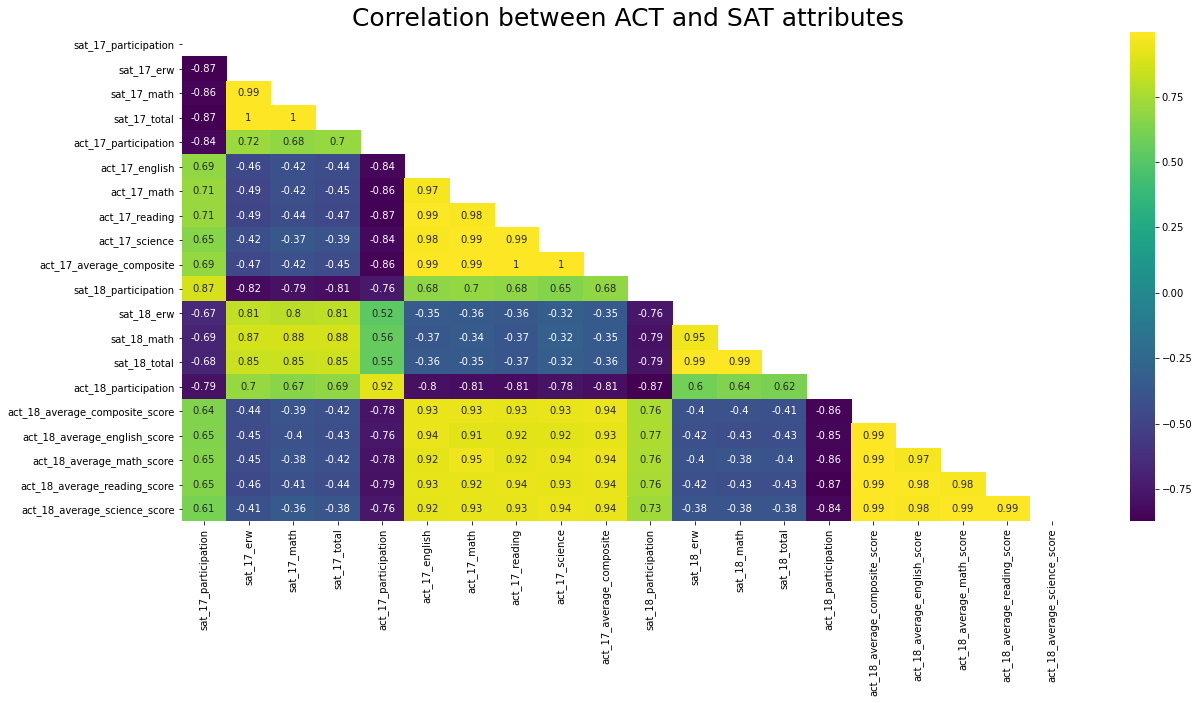

In [118]:
mask = np.zeros_like(final_sat_act.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,9))
sns.heatmap(final_sat_act.corr(),cmap='viridis',annot=True, mask = mask)
plt.title('Correlation between ACT and SAT attributes', fontsize=25)

plt.show()

From the heatmap, there's high positive correlation between ACT 2017 and ACT 2018 test scores and the participation scores.

There's also high negative correlation between SAT and ACT participation rate and their respective test scores.


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [119]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None, lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(11,7)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().max()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'blue']
        #ax[i].hist(dataframe[column],bins=8, color=color) # feel free to add more settings
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[i], ax=ax[i])
        # Set titles, labels, etc here for each subplot
        
        # Axes vline
        #ax[i].axvline(x=0.5, ymin=0.0, ymax=1.0, color='k', linestyle='--', alpha=0.3)
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        #ax[i].text(x=mean, y=0, s='Holiday in US', alpha=0.7, color='#334f8d')
        #text(x=mean, y=10.5, s='Mean', color='red', fontsize=15)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        #ax[i].text(x=mean, y=10.5, s='Median', color='black', fontsize=15)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])

In [120]:
sat_all[['sat_17_participation', 'sat_18_participation']].mode().max()

sat_17_participation    3.0
sat_18_participation    4.0
dtype: float64

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [121]:
# Code

## Plotting the participation rates for SAT 2017 and 2018

In [122]:
sat_all.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,5.0,593,572,1165,6.0,595,571,1166
1,Alaska,38.0,547,533,1080,43.0,562,544,1106
2,Arizona,30.0,563,553,1116,29.0,577,572,1149
3,Arkansas,3.0,614,594,1208,5.0,592,576,1169
4,California,53.0,531,524,1055,60.0,540,536,1076


## Add the vertical lines for the mean, median, mode for the histograms

In [123]:
sat_all[['sat_17_participation', 'sat_18_participation']].mean()

sat_17_participation    39.803922
sat_18_participation    45.745098
dtype: float64

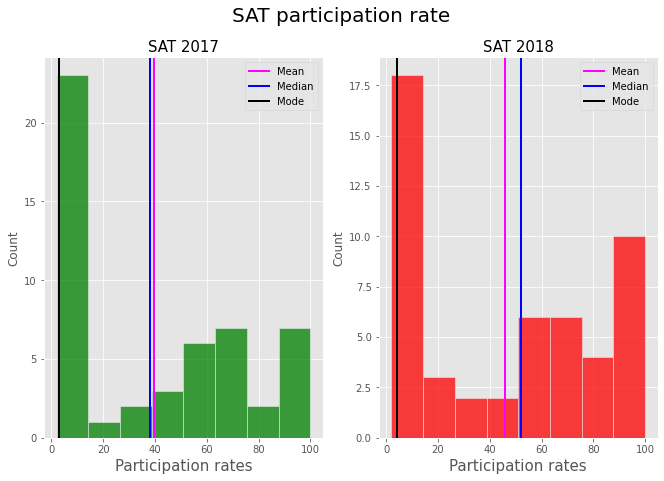

In [124]:
plt.style.use('ggplot')
subplot_histograms(sat_all, ['sat_17_participation', 'sat_18_participation'], 
                   ['SAT 2017', 'SAT 2018'], 'Participation rates', sup_title='SAT participation rate')


# mean = sat_all[['sat_17_participation', 'sat_18_participation']].mean()
# plt.axvline(mean[0])
# plt.axvline(mean[1])

In [125]:
sat_17_18.describe()

,sat_17_participation,sat_18_participation,Difference in %
count,51.000000,51.000000,51.000000
mean,39.803922,45.745098,50.666667
std,35.276632,37.314256,176.432045
min,2.000000,2.000000,0.000000
25%,4.000000,4.500000,0.000000
50%,38.000000,52.000000,8.000000
75%,66.000000,77.500000,26.500000
max,100.000000,100.000000,1000.000000


Most of the participation rate is between **0-10%** for **SAT**.

There seems to be about **25%** increase in SAT participation from 2017 to 2018 judging from the *mean values*.

## Plotting the math tests for SAT 2017 and 2018

In [126]:
sat_math = sat_all[['sat_17_math', 'sat_18_math']]
sat_math.head()

,sat_17_math,sat_18_math
0,572,571
1,533,544
2,553,572
3,594,576
4,524,536


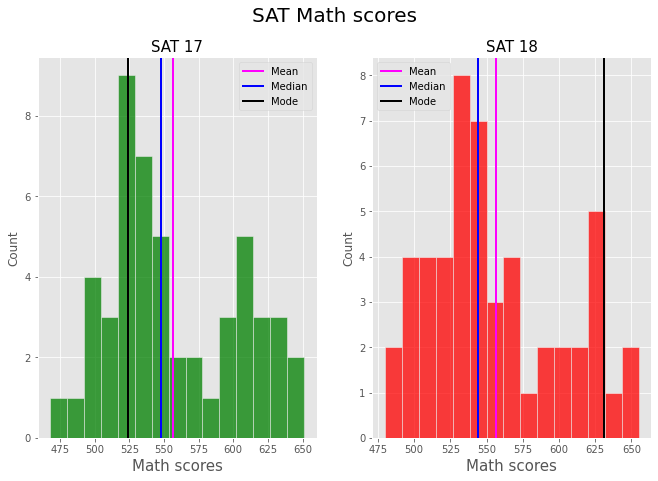

In [127]:
subplot_histograms(sat_math, ['sat_17_math', 'sat_18_math'], 
                   ['SAT 17', 'SAT 18'], 'Math scores', sup_title='SAT Math scores', bins=15)

Based on the histogram, the majority's math scores looks to have increased from 525 to 540 and the right end of the curve increase from about 615 to 625
from 2017 to 2018.

## Plotting the reading and verbal scores for SAT 2017 and 2018

In [128]:
sat_all.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total', 'sat_18_participation', 'sat_18_erw', 'sat_18_math',
       'sat_18_total'],
      dtype='object')

In [129]:
sat_erw = sat_all[['sat_17_erw', 'sat_18_erw']]
sat_erw.head()

,sat_17_erw,sat_18_erw
0,593,595
1,547,562
2,563,577
3,614,592
4,531,540


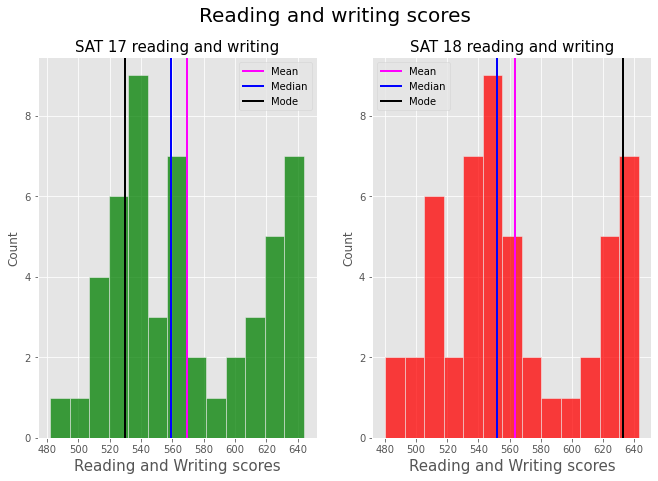

In [130]:
subplot_histograms(sat_erw, ['sat_17_erw', 'sat_18_erw'],
                   ['SAT 17 reading and writing', 'SAT 18 reading and writing'],
                   'Reading and Writing scores', sup_title='Reading and writing scores', bins=13)

Reading and writing scores have slightly increased from 540 to 550 from 2017 to 2018.

## Plotting the participation rates for ACT 2017 and 2018

In [131]:
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [132]:
act_2018.head()

,state,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


In [133]:
act_all = pd.merge(act_2017, act_2018, on='state')
act_all.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,100.0,19.4,19.1,18.9,19.7,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8,27.0,22.7,22.5,22.5,23.0,22.1


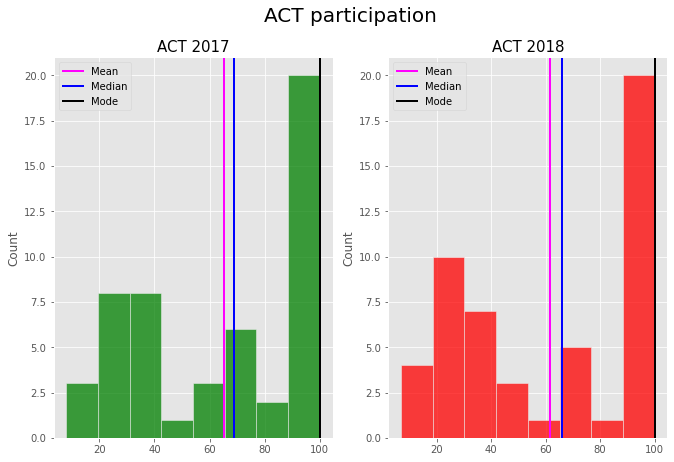

In [134]:
subplot_histograms(act_all, ['act_17_participation', 'act_18_participation'], ['ACT 2017', 'ACT 2018'], sup_title='ACT participation')

In [135]:
act_all['act_17_participation'].value_counts().head()

100.0    17
29.0      5
31.0      3
18.0      2
73.0      2
Name: act_17_participation, dtype: int64

Participation rate for **ACT** is much higher compared to SAT. Also, the participation rates do not differ as much year to year.

Plot and interpret histograms

For each of the following:

* Participation rates for SAT & ACT
* Math scores for SAT & ACT
* Reading/verbal scores for SAT & ACT



## Plotting the Math scores for ACT 2017 and 2018

In [136]:
act_all.columns

Index(['state', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

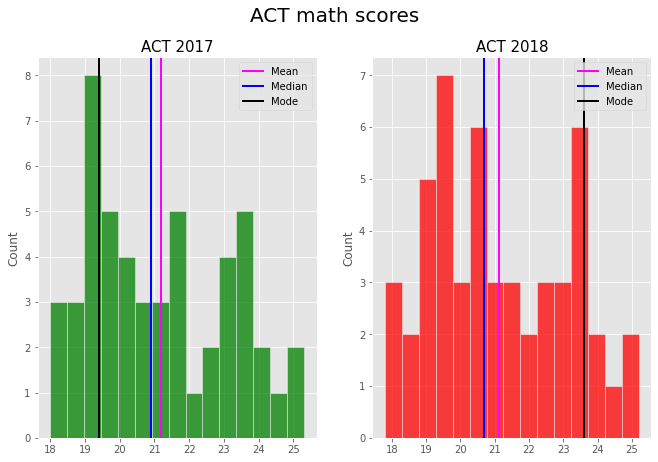

In [137]:
subplot_histograms(act_all, ['act_17_math', 'act_18_average_math_score'], 
                   ['ACT 2017', 'ACT 2018'],
                   bins=15,
                   sup_title='ACT math scores')

There's a slight increase in students scoring in Math in 2018 compared to 2017.

### Plotting the reading and verbal scores

In [138]:
act_all.columns

Index(['state', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

### ACT English scores

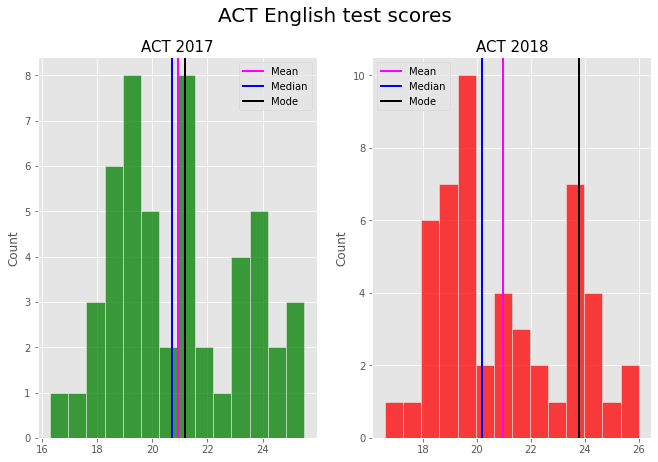

In [139]:
subplot_histograms(act_all, ['act_17_english', 'act_18_english'], 
                   ['ACT 2017', 'ACT 2018'],
                   bins=14,
                   sup_title='ACT English test scores')

In [140]:
act_all[['act_17_english', 'act_18_english']].agg(['mean','median'])

,act_17_english,act_18_average_english_score
mean,20.931373,20.988235
median,20.700000,20.200000


In [141]:
act_all[['act_17_english', 'act_18_english']].mode()

,act_17_english,act_18_average_english_score
0,19.0,18.2
1,19.5,19.8
2,21.2,23.8


Act English scores looks about the same for the years

### ACT Reading scores

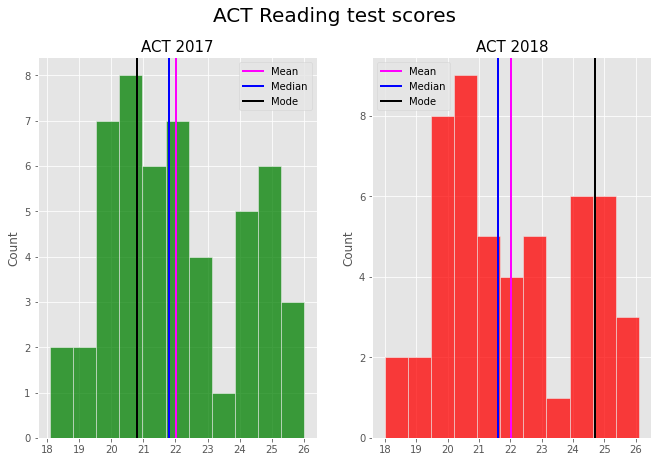

In [142]:
subplot_histograms(act_all, ['act_17_reading', 'act_18_average_reading_score'], 
                   ['ACT 2017', 'ACT 2018'],
                   bins=11,
                   sup_title='ACT Reading test scores')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [143]:
def scatterplots(dataframe, x, y, title, xlabel = None, ylabel = None, color='red'):    
    plt.figure(figsize=(11,7))
    sns.scatterplot(x=x, y=y, data=dataframe, color = color, s=40)
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

In [144]:
sat_all.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,5.0,593,572,1165,6.0,595,571,1166
1,Alaska,38.0,547,533,1080,43.0,562,544,1106
2,Arizona,30.0,563,553,1116,29.0,577,572,1149
3,Arkansas,3.0,614,594,1208,5.0,592,576,1169
4,California,53.0,531,524,1055,60.0,540,536,1076


## SAT and ACT 2017 math scores

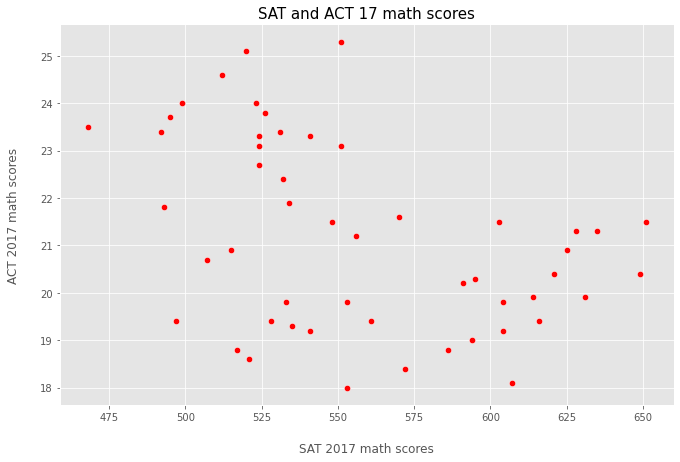

In [145]:
scatterplots(final_sat_act, 'sat_17_math', 'act_17_math', 'SAT and ACT 17 math scores', 'SAT 2017 math scores', 'ACT 2017 math scores')

## SAT and ACT 2017 verbal and reading scores

In [146]:
final_sat_act.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

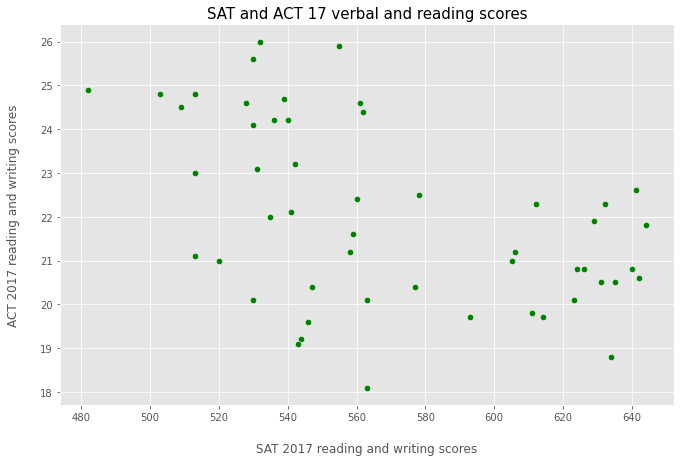

In [147]:
scatterplots(final_sat_act, 'sat_17_erw', 'act_17_reading', 
             'SAT and ACT 17 verbal and reading scores', 'SAT 2017 reading and writing scores', 
             'ACT 2017 reading and writing scores', color='green')

## SAT vs. ACT total/composite scores for 2017

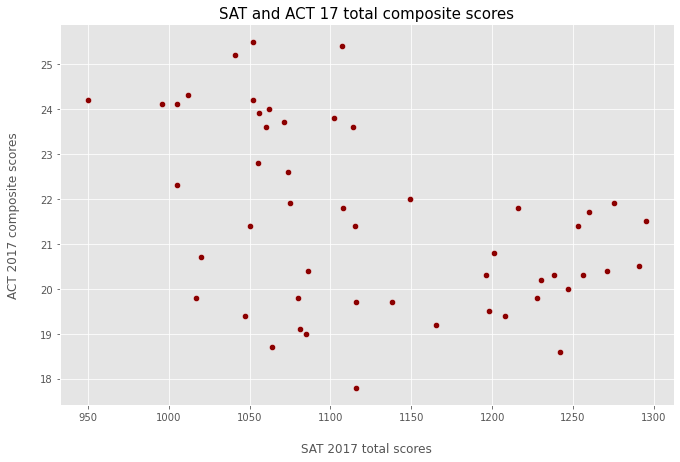

In [148]:
scatterplots(final_sat_act, 'sat_17_total', 'act_17_average_composite', 
             'SAT and ACT 17 total composite scores', 'SAT 2017 total scores', 
             'ACT 2017 composite scores', color='darkred')

## Total scores for SAT 2017 vs. 2018

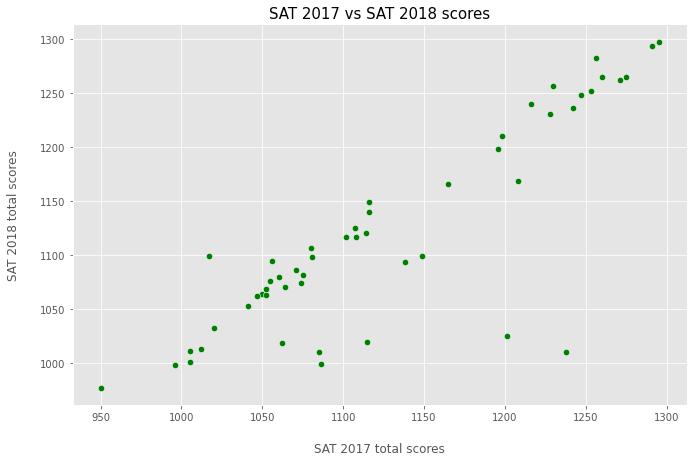

In [149]:
scatterplots(final_sat_act, 'sat_17_total', 'sat_18_total', 
             'SAT 2017 vs SAT 2018 scores', 'SAT 2017 total scores', 
             'SAT 2018 total scores', color='green')

## Composite scores for ACT 2017 vs. 2018

In [150]:
final_sat_act.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

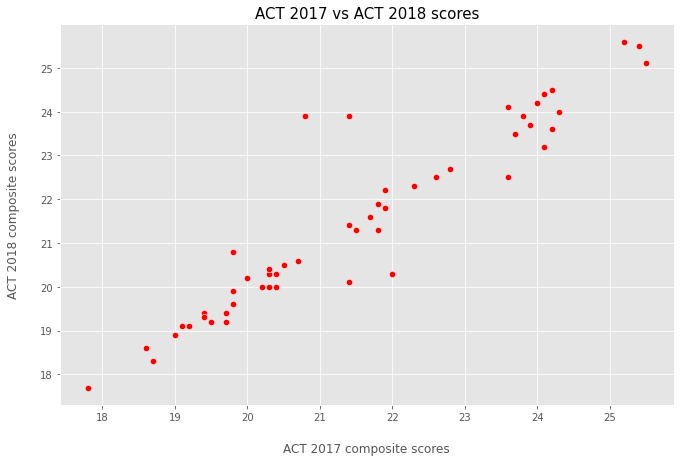

In [151]:
scatterplots(final_sat_act, 'act_17_average_composite', 'act_18_average_composite_score', 
             'ACT 2017 vs ACT 2018 scores', 'ACT 2017 composite scores', 
             'ACT 2018 composite scores', color='red')

In [152]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [153]:
final_sat_act.dtypes

state                              object
sat_17_participation              float64
sat_17_erw                          int64
sat_17_math                         int64
sat_17_total                        int64
act_17_participation              float64
act_17_english                    float64
act_17_math                       float64
act_17_reading                    float64
act_17_science                    float64
act_17_average_composite          float64
sat_18_participation              float64
sat_18_erw                          int64
sat_18_math                         int64
sat_18_total                        int64
act_18_participation              float64
act_18_average_composite_score    float64
act_18_average_english_score      float64
act_18_average_math_score         float64
act_18_average_reading_score      float64
act_18_average_science_score      float64
dtype: object

In [154]:
final_sat_act.select_dtypes(['int64','float']).columns # Numeric variables

Index(['sat_17_participation', 'sat_17_erw', 'sat_17_math', 'sat_17_total',
       'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_average_composite',
       'sat_18_participation', 'sat_18_erw', 'sat_18_math', 'sat_18_total',
       'act_18_participation', 'act_18_average_composite_score',
       'act_18_average_english_score', 'act_18_average_math_score',
       'act_18_average_reading_score', 'act_18_average_science_score'],
      dtype='object')

In [155]:
final_sat_act.select_dtypes(['int','float']).agg(['min', 'max'])

,sat_17_participation,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_average_composite,sat_18_participation,act_18_participation,act_18_average_composite_score,act_18_average_english_score,act_18_average_math_score,act_18_average_reading_score,act_18_average_science_score
min,2.0,8.0,16.3,18.0,18.1,18.2,17.8,2.0,7.0,17.7,16.6,17.8,18.0,17.9
max,100.0,100.0,25.5,25.3,26.0,24.9,25.5,100.0,100.0,25.6,26.0,25.2,26.1,24.9


## SAT and ACT participation box plots

In [156]:
final_sat_act[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']].agg(['min', 'max'])

,sat_17_participation,sat_18_participation,act_17_participation,act_18_participation
min,2.0,2.0,8.0,7.0
max,100.0,100.0,100.0,100.0


In [157]:
def boxplots(dataframe, title, xlabel = None, yticklabels = None, palette='coolwarm'):    
    plt.figure(figsize=(11,7))
    sns.boxplot(data=dataframe, orient='h', palette=palette)
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=20, pad=15)
    plt.xlabel(xlabel, labelpad=20, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(ticks=[tick for tick in range(len(dataframe.columns))], labels= yticklabels, fontsize=15)
    plt.show()

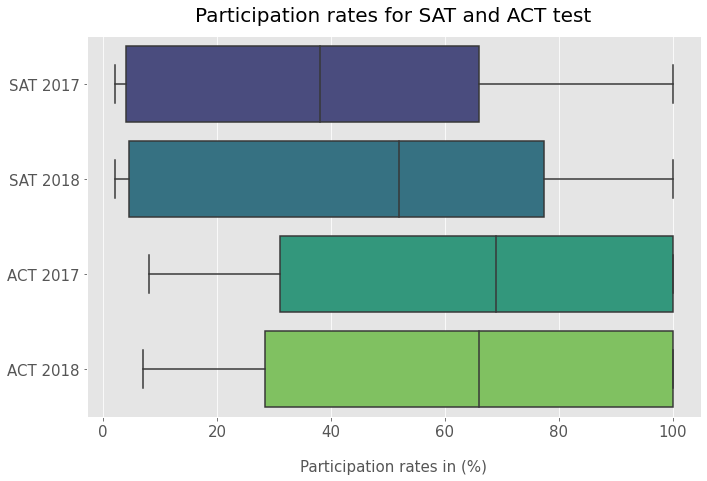

In [158]:
all_part = final_sat_act[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']]
boxplots(all_part, 'Participation rates for SAT and ACT test', 'Participation rates in (%)', ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], palette='viridis')

### Interpreting SAT participation rates

The *participation rate*  for SAT 2018 is **much higher** compared to SAT 2017 given the wider box in SAT 2018. 

The *median participation rate* for SAT 2018 is also **much higher** compared to SAT 2017.

### Interpreting ACT participation rates

In contrast to SAT participation rates, both ACT participation rates in 2017 and 2018 are **much higher compared to SAT**.

There's a slight increase in participation in ACT 2018 compared to ACT 2017.

## SAT and ACT evidence based reading and writing box plots

In [163]:
final_sat_act[['sat_17_erw', 'sat_18_erw', 'act_17_english', 'act_17_reading', 'act_18_english', 'act_18_average_reading_score']]

,sat_17_erw,sat_18_erw,act_17_english,act_17_reading,act_18_average_english_score,act_18_average_reading_score
0,593,595,18.9,19.7,18.9,19.6
1,547,562,18.7,20.4,19.8,21.6
2,563,577,18.6,20.1,18.2,19.5
3,614,592,18.9,19.7,19.1,19.7
4,531,540,22.5,23.1,22.5,23.0
5,606,519,20.1,21.2,23.9,24.4
6,530,535,25.5,25.6,26.0,26.1
7,503,505,24.1,24.8,23.7,24.5
8,482,497,24.4,24.9,23.7,24.4
9,520,550,19.0,21.0,19.2,21.1


In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

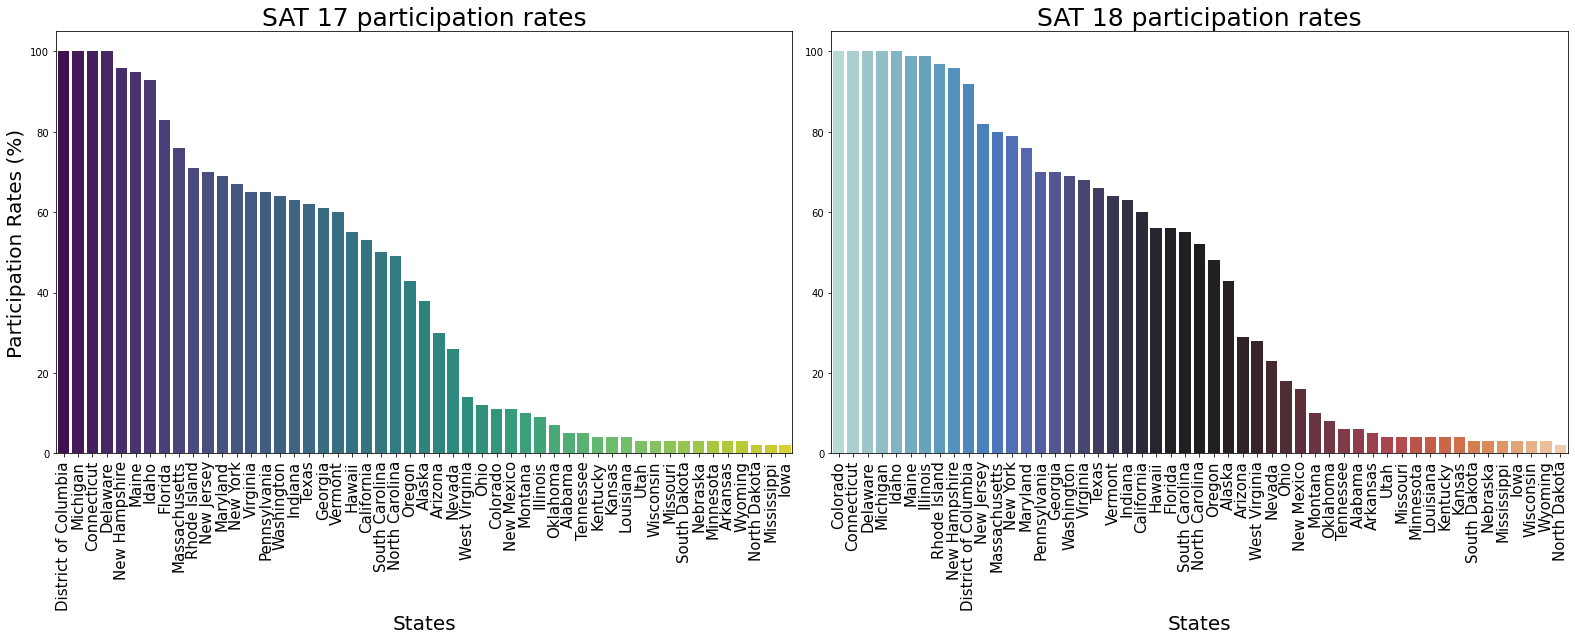

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,9))

sns.barplot(x=sat_17_part['state'], y='sat_17_participation', data=sat_17_part, palette='viridis', ax=axes[0])
axes[0].set_title('SAT 17 participation rates', fontsize=25)
axes[0].set_xticklabels(labels=sat_17_part['state'],rotation=90, fontsize=15)
axes[0].set_xlabel('States', fontsize= 20)
axes[0].set_ylabel('Participation Rates (%)', fontsize=20)

sns.barplot(x=sat_18_part['state'], y='sat_18_participation', data=sat_18_part, palette='icefire', ax=axes[1])
axes[1].set_title('SAT 18 participation rates', fontsize=25)
axes[1].set_xticklabels(labels=sat_18_part['state'],rotation=90, fontsize=15)
axes[1].set_xlabel('States', fontsize= 20)
axes[1].set_ylabel('', fontsize=20)


plt.tight_layout()
plt.show()

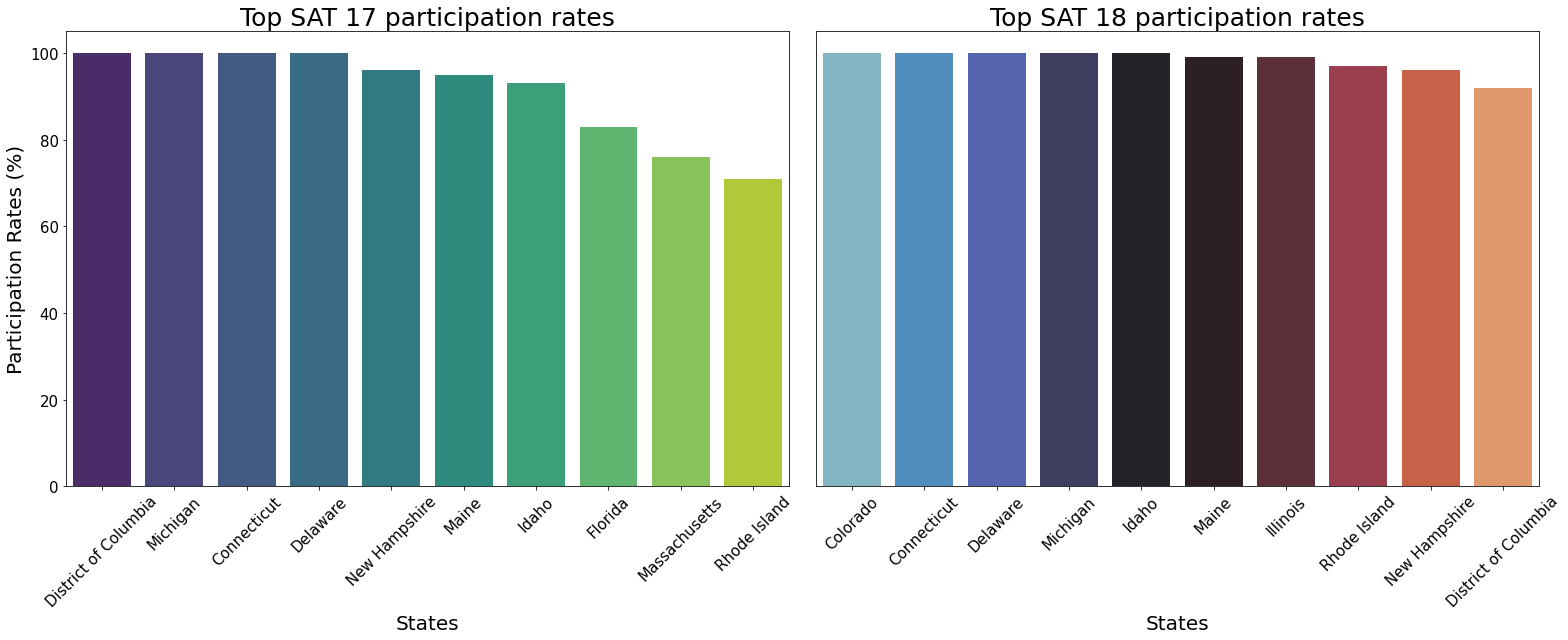

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,9))

# axes.uptitle('Hello')

sns.barplot(x=sat_17_part['state'].head(10), y='sat_17_participation', data=sat_17_part.head(10), palette='viridis', ax=axes[0])
axes[0].set_title('Top SAT 17 participation rates', fontsize=25)
axes[0].set_xticklabels(labels=sat_17_part['state'].head(10),rotation=45, fontsize=15)
axes[0].set_yticks(ticks=[0, 20, 40, 60, 80, 100]) # Set the ytick locations on the y-axis
axes[0].set_yticklabels(['0','20','40', '60', '80', '100'],fontsize=15) # Set the ytick labels for the yticks
axes[0].set_xlabel('States', fontsize= 20)
axes[0].set_ylabel('Participation Rates (%)', fontsize=20)

sns.barplot(x=sat_18_part['state'].head(10), y='sat_18_participation', data=sat_18_part.head(10), palette='icefire', ax=axes[1])
axes[1].set_title('Top SAT 18 participation rates', fontsize=25)
axes[1].set_xticklabels(labels=sat_18_part['state'].head(10),rotation=45, fontsize=15)
axes[1].set_yticks([])
axes[1].set_xlabel('States', fontsize= 20)
axes[1].set_ylabel('', fontsize=20)


plt.tight_layout()
plt.show()

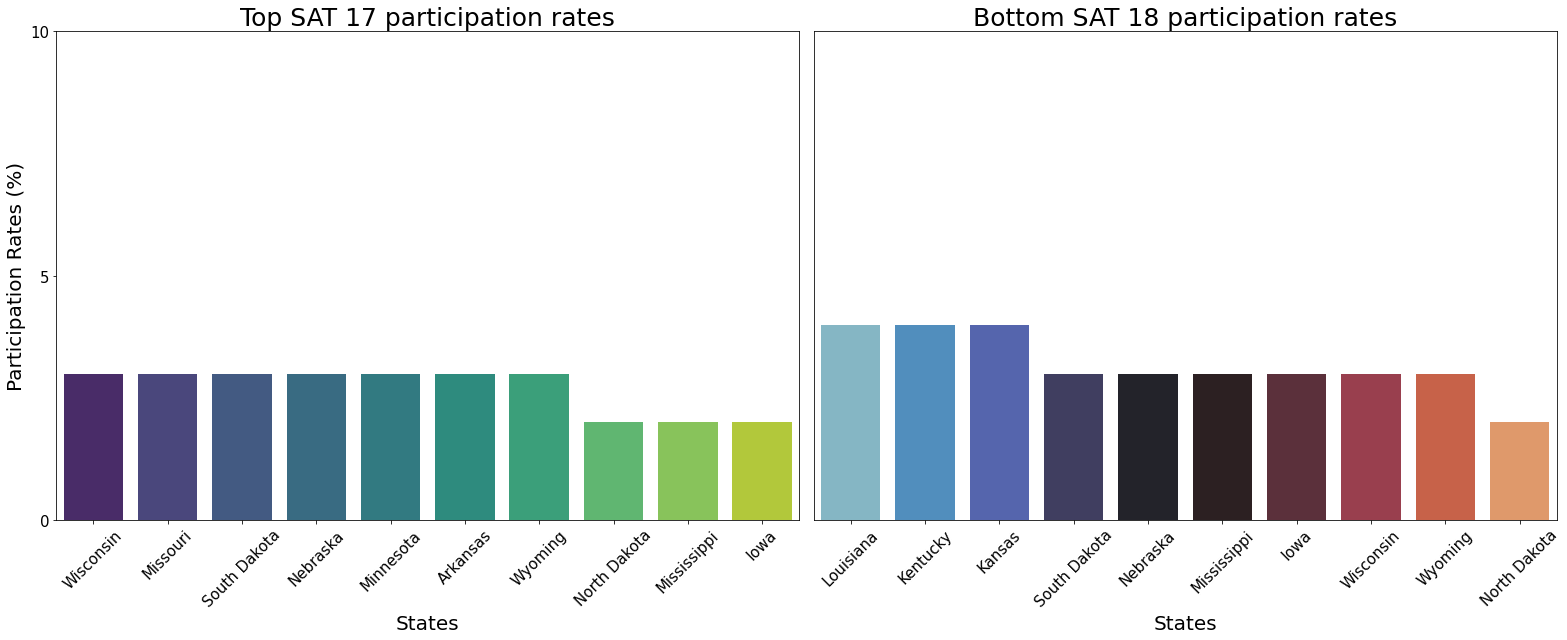

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22,9))

# sns.barplot(y=sat_17_part['state'].tail(10), x='sat_17_participation', data=sat_17_part.tail(10), palette='viridis', ax=axes[0], orient='horizontal')
sns.barplot(x=sat_17_part['state'].tail(10), y='sat_17_participation', data=sat_17_part.tail(10), palette='viridis', ax=axes[0])
axes[0].set_title('Top SAT 17 participation rates', fontsize=25)
axes[0].set_xticklabels(labels=sat_17_part['state'].tail(10),rotation=45, fontsize=15)
axes[0].set_yticks(ticks=[0, 5, 10]) # Set the ytick locations on the y-axis
axes[0].set_yticklabels(['0','5', '10'],fontsize=15) # Set the ytick labels for the yticks
axes[0].set_xlabel('States', fontsize= 20)
axes[0].set_ylabel('Participation Rates (%)', fontsize=20)

sns.barplot(x=sat_18_part['state'].tail(10), y='sat_18_participation', data=sat_18_part.tail(10), palette='icefire', ax=axes[1])
axes[1].set_title('Bottom SAT 18 participation rates', fontsize=25)
axes[1].set_xticklabels(labels=sat_18_part['state'].tail(10),rotation=45, fontsize=15)
axes[1].set_yticks(ticks=[0, 5, 10]) # Set the ytick locations on the y-axis
axes[1].set_yticks(ticks=[])
axes[1].set_xlabel('States', fontsize= 20)
axes[1].set_ylabel('', fontsize=20)


plt.tight_layout()
plt.show()

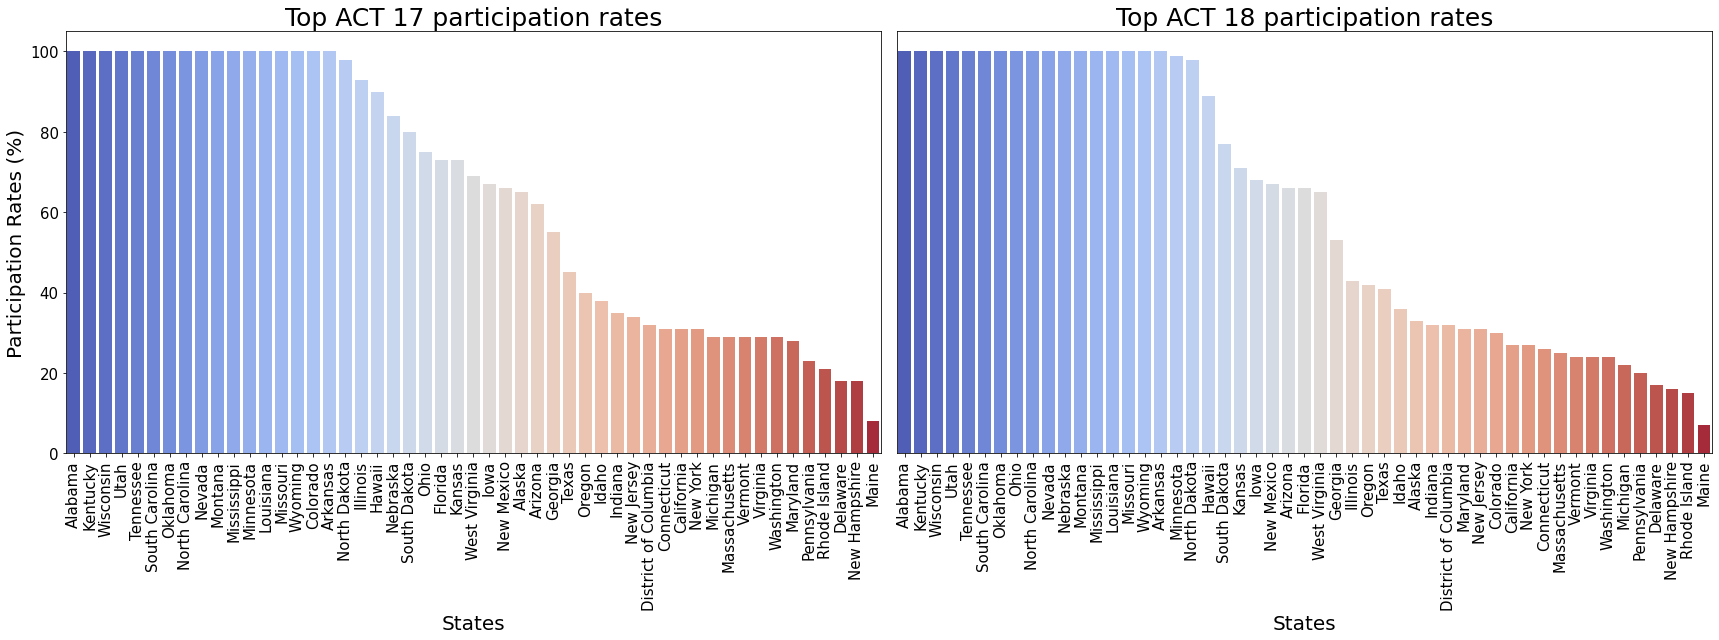

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,9))

sns.barplot(x='state', y='act_17_participation', data=act_17_part, palette='coolwarm', ax=axes[0])

axes[0].set_title('Top ACT 17 participation rates', fontsize=25)
axes[0].set_xticklabels(labels=act_17_part['state'], rotation=90, fontsize=15)
axes[0].set_yticks(ticks=[0, 20, 40, 60, 80, 100])
axes[0].set_yticklabels(['0','20','40', '60', '80', '100'],fontsize=15)
axes[0].set_xlabel('States', fontsize= 20)
axes[0].set_ylabel('Participation Rates (%)', fontsize=20)


sns.barplot(x='state', y='act_18_participation', data=act_18_part, palette='coolwarm', ax=axes[1])

axes[1].set_title('Top ACT 18 participation rates', fontsize=25)
axes[1].set_xticklabels(labels=act_18_part['state'], rotation=90, fontsize=15)
axes[1].set_xlabel('States', fontsize= 20)
axes[0].set_yticks(ticks=[0, 20, 40, 60, 80, 100])
axes[1].set_yticks(ticks=[])
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The skewness of the data, right / left skewed? 

The spread of the data, your standard deviation. (look at your histogram)

Central Tendency - Mean, Median, Mode

Answers:


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?